In [97]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

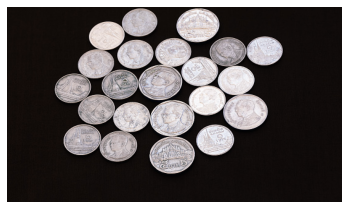

In [98]:
coin = cv2.imread("coin.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

## Blurring

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

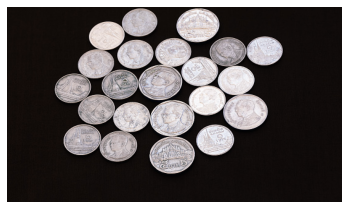

In [99]:
coin_blur = cv2.medianBlur(coin,3)
plt.figure(),plt.imshow(coin_blur),plt.axis("off")



## GrayScale

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

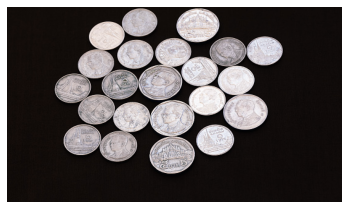

In [100]:
#grayscale
coin_gray = cv2.cvtColor(coin_blur,cv2.COLOR_BGR2GRAY)
plt.figure(),plt.imshow(coin_blur),plt.axis("off")

## Binary_Threshold

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

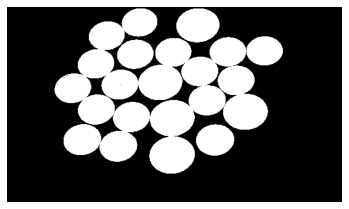

In [101]:
ret , coin_thresh = cv2.threshold(coin_gray,40,255,cv2.THRESH_BINARY)
plt.figure(),plt.imshow(coin_thresh,cmap="gray"),plt.axis("off")

## Kontur Algılama

In [102]:
contours, hierarch = cv2.findContours(coin_thresh,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

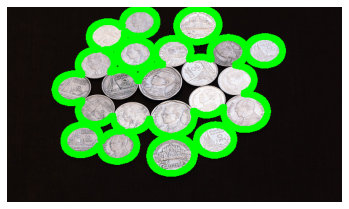

In [103]:
for _ in range(len(contours)):
    if hierarch[0][_][3] == -1:
        cv2.drawContours(coin,contours,_,(0,255,0),10)

plt.figure(),plt.imshow(coin),plt.axis("off")

## Bazı paraların konturu alınamadı. Birleşik gözüken coinler olunca iyi alınamıyor.

## ÇÖZÜM

#### Resmi baştan yükleme,blurring,gray,threshold ...

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

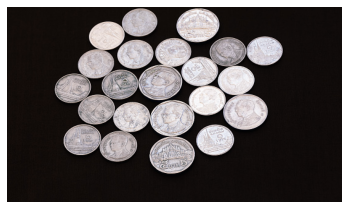

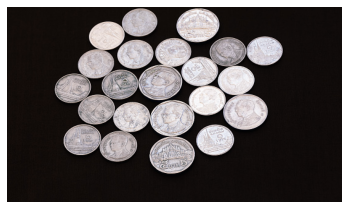

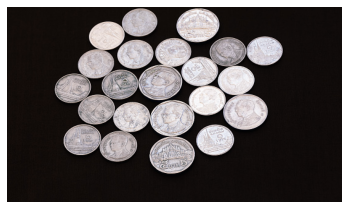

In [130]:
coin = cv2.imread("coin.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

coin_blur = cv2.medianBlur(coin,1)
plt.figure(),plt.imshow(coin_blur),plt.axis("off")

#grayscale
coin_gray = cv2.cvtColor(coin_blur,cv2.COLOR_BGR2GRAY)
plt.figure(),plt.imshow(coin_blur),plt.axis("off")


### Opening

(<Figure size 432x288 with 0 Axes>,
 <Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

<Figure size 432x288 with 0 Axes>

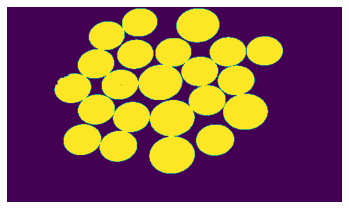

In [131]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(coin_thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
plt.figure(),plt.figure(),plt.imshow(opening),plt.axis("off")

## Nesneler Arası Distance

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

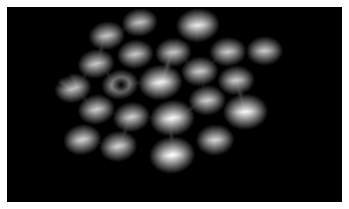

In [132]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.figure(),plt.imshow(dist_transform,cmap="gray"),plt.axis("off")

#### Köprüleri Yok Etmek için Nesneleri Küçültme (Genlikler kullanılıyor threshold içinde)

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

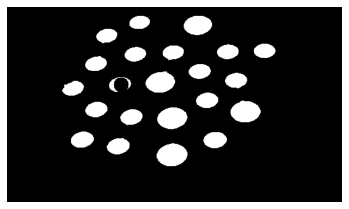

In [133]:
ret, sure_foreground = cv2.threshold(dist_transform,0.4*np.max(dist_transform),255,0)
plt.figure(),plt.imshow(sure_foreground,cmap="gray"),plt.axis("off")

#### Arka Plan İçin Resmi Büyültme
### opening büyütülüp sure_foreground çıkarıldı.

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

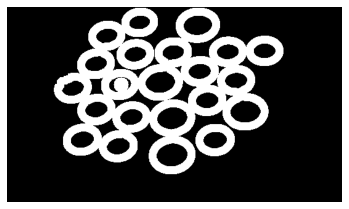

In [134]:
sure_background = cv2.dilate(opening,kernel,iterations = 1)
sure_foreground = np.uint8(sure_foreground)
unknown = cv2.subtract(sure_background,sure_foreground)
plt.figure(),plt.imshow(unknown,cmap="gray"),plt.axis("off")


## Bağlantı

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

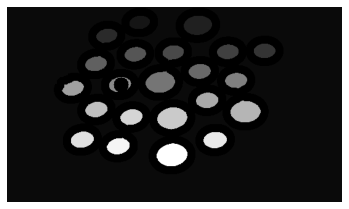

In [135]:
ret,marker = cv2.connectedComponents(sure_foreground)
marker = marker+1
marker[unknown>=250] = 0
plt.figure(),plt.imshow(marker,cmap="gray"),plt.axis("off")


#### HAVZA


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

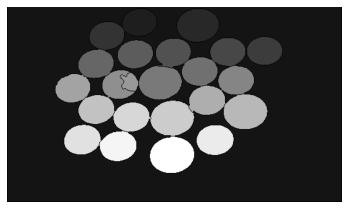

In [136]:
marker = cv2.watershed(coin,marker)
plt.figure(),plt.imshow(marker,cmap="gray"),plt.axis("off")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 543.5, 316.5, -0.5))

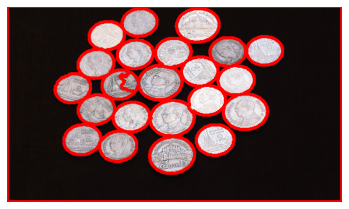

In [137]:
contours, hierarch = cv2.findContours(marker.copy(),cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for _ in range(len(contours)):
    if hierarch[0][_][3] == -1:
        cv2.drawContours(coin,contours,_,(255,0,0),2)

plt.figure(),plt.imshow(coin),plt.axis("off")